In [1]:
# open csv file
import pandas as pd
df = pd.read_csv('../Data/IMDBsentiment/IMDBsentiment/Train.csv')

# show first 5 rows
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [2]:
# remove all characters except a-z, A-Z, 0-9, äöüÄÖÜß, ., !, ?
# remove double spaces
# remove multiple dots
# convert to lower case
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9äöüÄÖÜß.,!?]', ' ', text)
    text = re.sub(r' +', ' ', text)
    text = re.sub(r'\.+', '.', text)
    text = text.lower()
    return text

df['text'] = df['text'].apply(clean_text)

# show first 5 rows
df.head()

,text,label
0,i grew up b. 1965 watching and loving the thun...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


[151, 346, 193, 69, 183, 105, 246, 280, 190, 299, 132, 284, 93, 145, 134, 166, 1052, 233, 369, 288]
ever since i heard of the ralph bakshi version of the lord of the rings i wondered what the hell is rotoscope animation?!!! well. i finally found out. i saw this movie about three years ago not having any idea who ralph bakshi is. and i liked it. a lot. very good story line. it even has a little character development which is great for a cartoon. see it if you get bored with contemporary animation. don t get me wrong. i m not saying it s just a nice cartoon. it s a pretty good movie too.


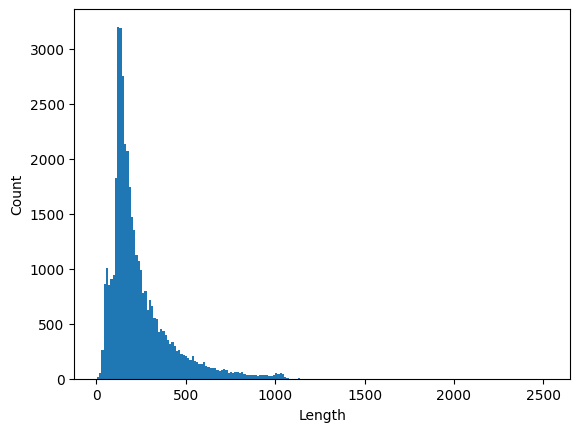

In [3]:
# Plot the distribution of lengths (word count) of reviews from the IMDB corpus.
import matplotlib.pyplot as plt
import numpy as np

# get lengths of all reviews
lengths = [len(x.split()) for x in df['text']]

print(lengths[:20])

# get 20th text from df
print(df['text'][20])

# plot distribution
plt.hist(lengths, bins=200)
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()


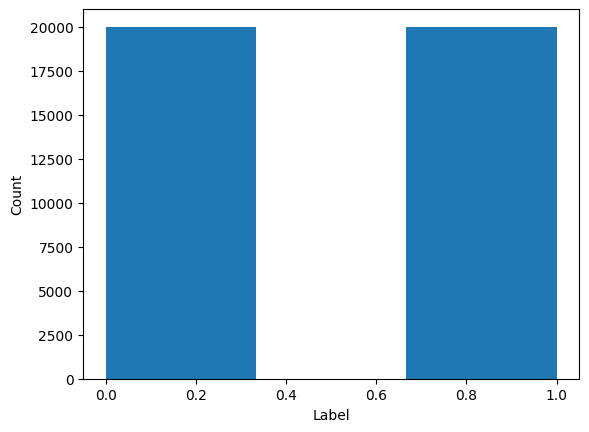

In [4]:
# What is the distribution of labels in the data set?
# Plot the distribution of labels in the data set.
import matplotlib.pyplot as plt
import numpy as np

# get labels
labels = df['label']

# plot distribution
plt.hist(labels, bins=3)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [5]:
# run this cell to download the stopwords
# import nltk
# nltk.download('stopwords')

In [6]:
# What are the k = 10 most common words of all reviews? (NLTK)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# remove stopwords from text
stop_words = set(stopwords.words('english'))
stop_words.append('br')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# get all words
words = [word for text in df['text'] for word in text.split()]

# get 10 most common words
fdist = nltk.FreqDist(words)
fdist.most_common(10)

print(fdist.most_common(10))

[('br', 161466), ('movie', 52072), ('film', 47771), ('one', 38824), ('like', 31405), ('.', 22129), ('good', 20065), ('even', 19782), ('would', 19550), (',', 17784)]
